In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import WrappedDiro2C, plot_diro2c_2d, plot_diro2c_tree, \
                           print_diro2c_rules
from baseline import print_rules, plot_tree_leafs_for_class
from tasks.cluster_example import make_task
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

# Global explanations

In [4]:
mclass_diff = comparer.predict_mclass_diff(X)

## $(0,1)$

In [5]:
focus_class = '(0, 1)'

In [46]:
%%time
explainer = WrappedDiro2C(X, comparer, focus_class)
explanation = explainer.generate_global_explanation()
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump((explainer, explanation), f, pickle.HIGHEST_PROTOCOL)

CPU times: user 24min 54s, sys: 14.2 s, total: 25min 9s
Wall time: 26min 59s


In [6]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explainer, explanation = pickle.load(f)

In [7]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [8]:
# Check for errors
is_explain_diff = explainer.clf_a.predict(X_explain) != explainer.clf_b.predict(X_explain)
(is_explain_diff != y_explain).sum(), len(y_explain)

(0, 81171)

In [9]:
def explain(max_depth=None, tree_fig_size=(28, 14)):
    global tree
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_explain, y_explain)
    
    feature_importances = tree.feature_importances_
    feature_order = np.flip(np.argsort(feature_importances))
    fig, ax = plt.subplots(figsize=(5, 2))
    ax.set_title('Relative feature importance')
    ax.scatter(np.flip(feature_importances[feature_order]),
               np.flip(comparer.feature_names[feature_order]))
    ax.set_xlim((0, ax.get_xlim()[1]))
    plt.show()
    
    fig, ax = plt.subplots(figsize=(14, 14))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, node_ids=True, precision=2)
    
    y_test = mclass_diff == np.where(comparer.class_names == focus_class)[0][0]
    print_rules(tree, feature_names, class_names, focus_class, X_test=X, y_test=y_test, precision=2)
    
    plot_tree_leafs_for_class(tree, class_names, focus_class, X, mclass_diff, comparer.class_names, feature_names)
    
    print('\ngenerated data evaluation:')
    print(classification_report(y_explain, tree.predict(X_explain), target_names=class_names))

    print('\noriginal data evaluation:')
    print(classification_report(mclass_diff == np.where(comparer.class_names == focus_class)[0][0], tree.predict(X), target_names=class_names))

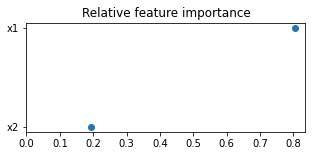

node #7: if (x1 > -10.02) and (x1 <= -0.0) and (x2 > -20.02) then class (0, 1) (covers 0.917 of 22247 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       0.90      0.97      0.93     54711
      (0, 1)       0.92      0.77      0.84     26460

    accuracy                           0.90     81171
   macro avg       0.91      0.87      0.88     81171
weighted avg       0.90      0.90      0.90     81171


original data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       0.99      0.97      0.98      1004
      (0, 1)       0.20      0.40      0.27        20

    accuracy                           0.96      1024
   macro avg       0.59      0.68      0.62      1024
weighted avg       0.97      0.96      0.96      1024



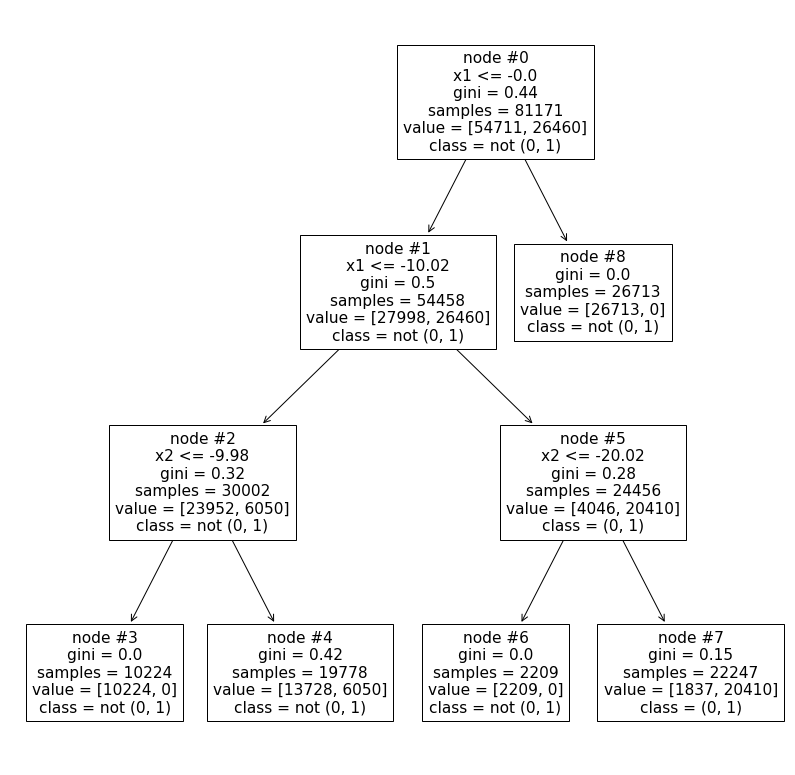

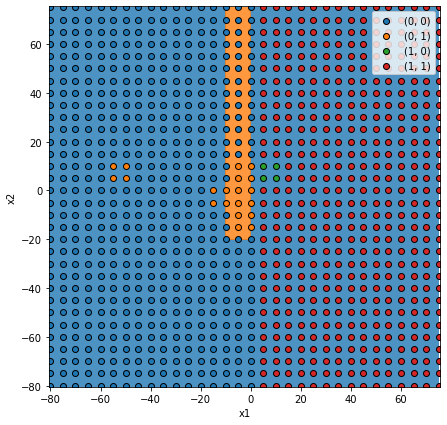

In [10]:
explain(max_depth=3)

This explanation has a very low F1-score for the focus class in the original data.

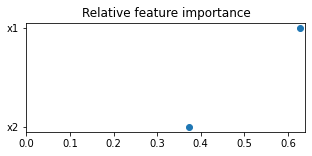

node #10: if (x1 > -10.02) and (x1 <= -0.0) and (x2 > -20.02) and (x2 <= 10.0) then class (0, 1) (covers 1.0 of 20412 instances)
node #5: if (x1 <= -10.02) and (x2 > -9.98) and (x2 <= 9.98) then class (0, 1) (covers 0.588 of 10287 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       1.00      0.92      0.96     54711
      (0, 1)       0.86      1.00      0.93     26460

    accuracy                           0.95     81171
   macro avg       0.93      0.96      0.94     81171
weighted avg       0.95      0.95      0.95     81171


original data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       0.99      0.96      0.97      1004
      (0, 1)       0.20      0.55      0.30        20

    accuracy                           0.95      1024
   macro avg       0.60      0.75      0.64      1024
weighted avg       0.98      0.95      0.96      1024



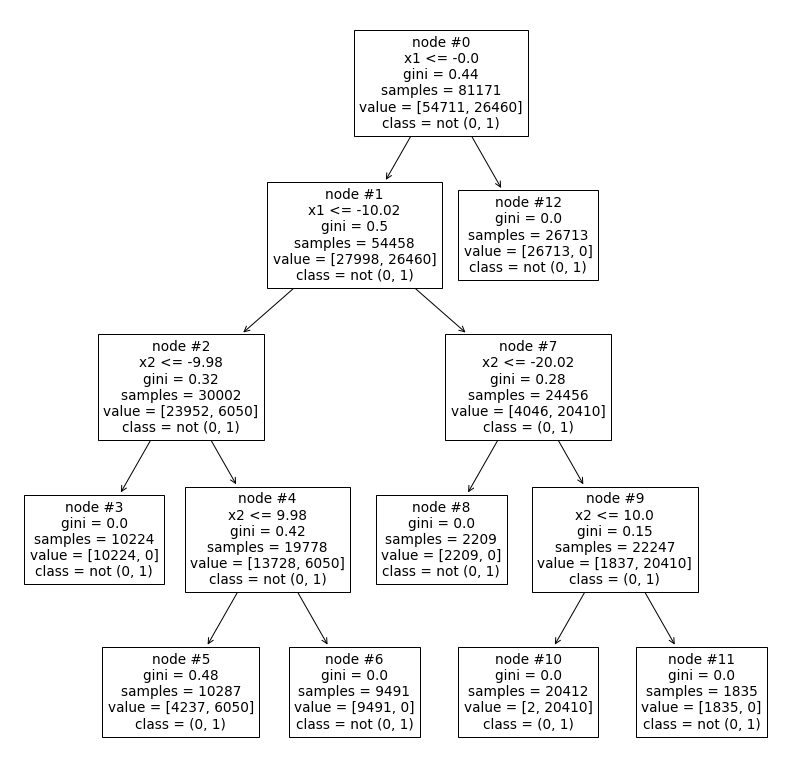

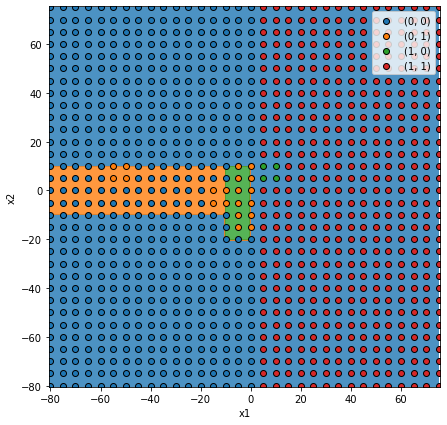

In [11]:
explain(max_depth=4)

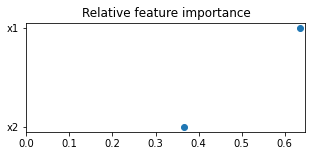

node #14: if (x1 > -10.0) and (x1 <= -0.0) and (x2 > -20.02) and (x2 <= 10.0) then class (0, 1) (covers 1.0 of 20398 instances)
node #7: if (x1 > -59.99) and (x1 <= -10.02) and (x2 > -9.98) and (x2 <= 9.98) then class (0, 1) (covers 0.639 of 9465 instances)
node #13: if (x1 > -10.02) and (x1 <= -10.0) and (x2 > -20.02) and (x2 <= 10.0) then class (0, 1) (covers 0.857 of 14 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       1.00      0.94      0.97     54711
      (0, 1)       0.89      1.00      0.94     26460

    accuracy                           0.96     81171
   macro avg       0.94      0.97      0.95     81171
weighted avg       0.96      0.96      0.96     81171


original data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       0.99      0.97      0.98      1004
      (0, 1)       0.28      0.55      0.37        20

    accuracy                           0.96      1024
   macro avg 

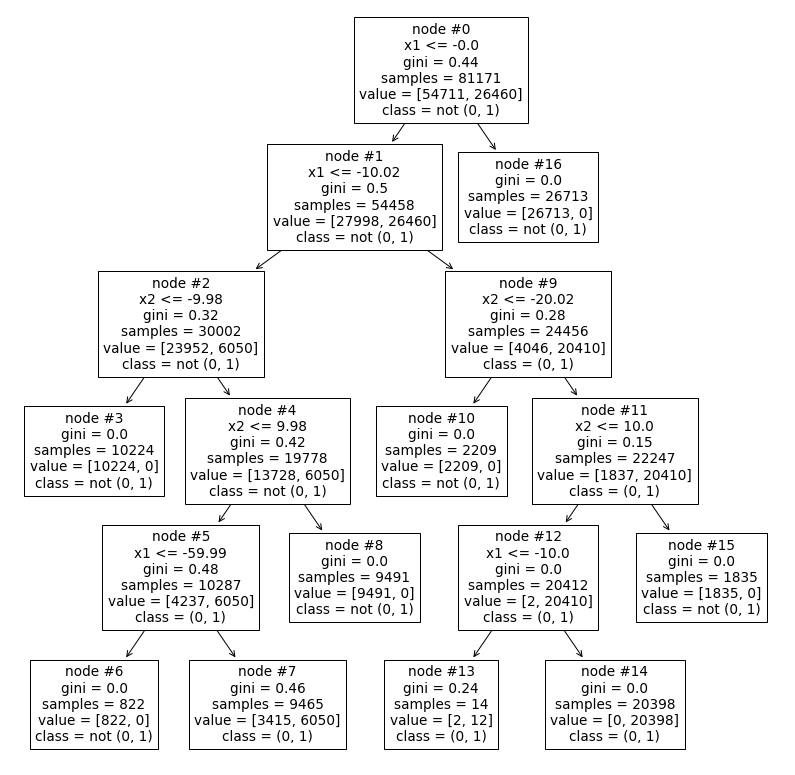

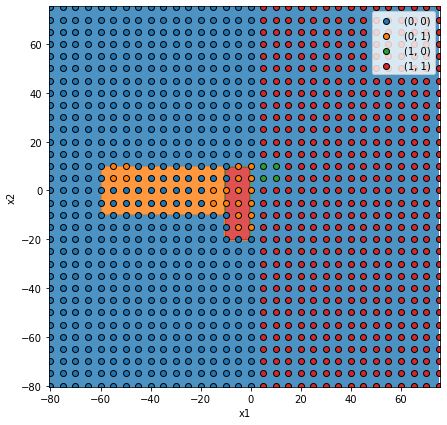

In [12]:
explain(max_depth=5)

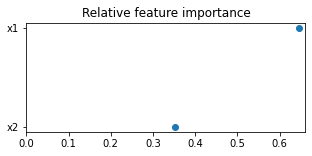

node #18: if (x1 > -10.0) and (x1 <= -0.0) and (x2 > -20.02) and (x2 <= 10.0) then class (0, 1) (covers 1.0 of 20398 instances)
node #8: if (x1 > -59.99) and (x1 <= -50.07) and (x2 > -9.98) and (x2 <= 9.98) then class (0, 1) (covers 0.94 of 3608 instances)
node #16: if (x1 > -10.02) and (x1 <= -10.0) and (x2 > -20.02) and (x2 <= -0.44) then class (0, 1) (covers 1.0 of 12 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       0.95      1.00      0.97     54711
      (0, 1)       0.99      0.90      0.94     26460

    accuracy                           0.96     81171
   macro avg       0.97      0.95      0.96     81171
weighted avg       0.97      0.96      0.96     81171


original data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       0.99      0.99      0.99      1004
      (0, 1)       0.53      0.40      0.46        20

    accuracy                           0.98      1024
   macro avg   

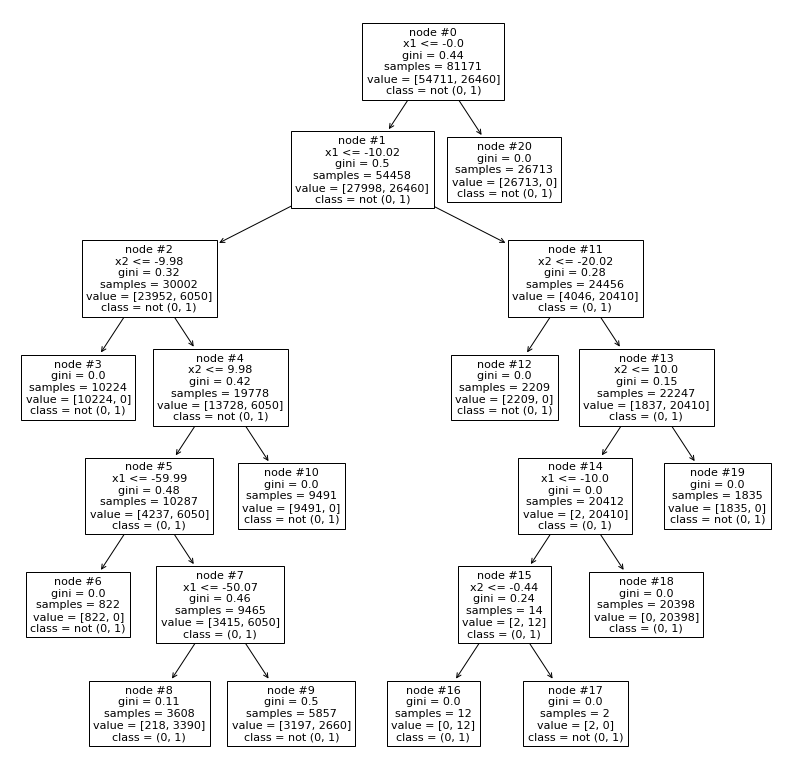

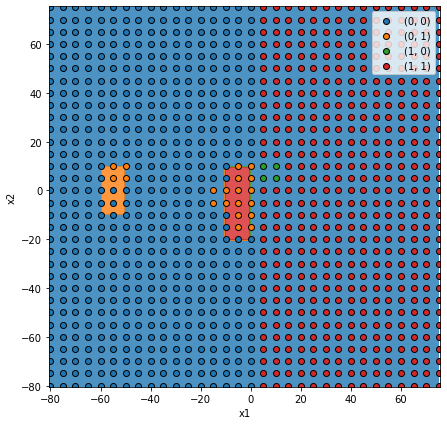

In [13]:
explain(max_depth=6)

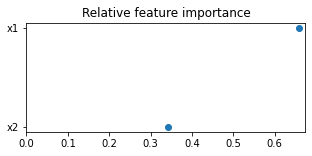

node #22: if (x1 > -10.0) and (x1 <= -0.0) and (x2 > -20.02) and (x2 <= 10.0) then class (0, 1) (covers 1.0 of 20398 instances)
node #10: if (x1 > -59.99) and (x1 <= -50.07) and (x2 > -0.02) and (x2 <= 9.98) then class (0, 1) (covers 1.0 of 3390 instances)
node #13: if (x1 > -19.98) and (x1 <= -10.02) and (x2 > -9.98) and (x2 <= 9.98) then class (0, 1) (covers 0.815 of 3257 instances)
node #20: if (x1 > -10.02) and (x1 <= -10.0) and (x2 > -20.02) and (x2 <= -0.44) then class (0, 1) (covers 1.0 of 12 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       1.00      0.99      0.99     54711
      (0, 1)       0.98      1.00      0.99     26460

    accuracy                           0.99     81171
   macro avg       0.99      0.99      0.99     81171
weighted avg       0.99      0.99      0.99     81171


original data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       0.99      0.99      0.99    

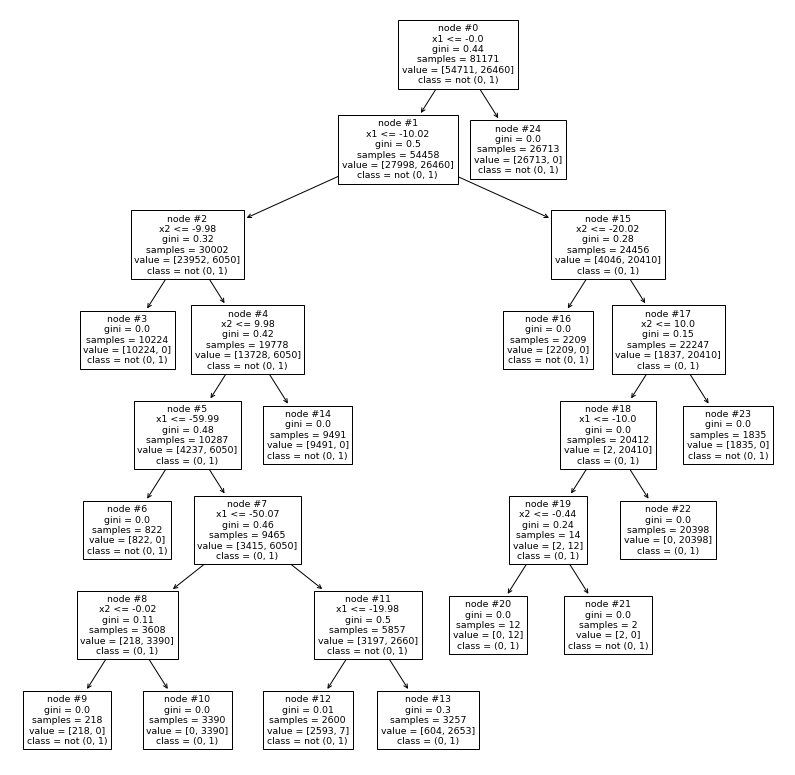

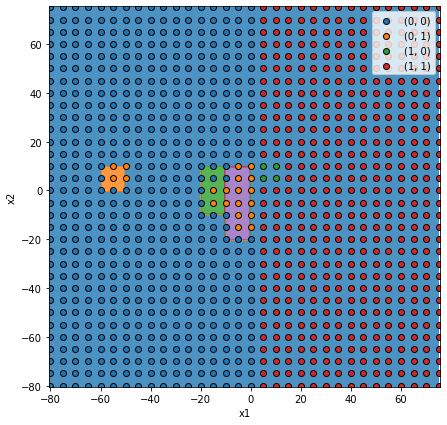

In [14]:
explain(max_depth=7)

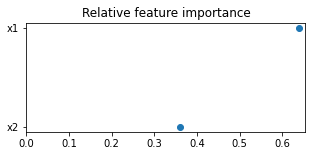

node #26: if (x1 > -10.0) and (x1 <= -0.0) and (x2 > -20.02) and (x2 <= 10.0) then class (0, 1) (covers 1.0 of 20398 instances)
node #10: if (x1 > -59.99) and (x1 <= -50.07) and (x2 > -0.02) and (x2 <= 9.98) then class (0, 1) (covers 1.0 of 3390 instances)
node #16: if (x1 > -19.98) and (x1 <= -10.02) and (x2 > -9.98) and (x2 <= 0.0) then class (0, 1) (covers 1.0 of 2653 instances)
node #24: if (x1 > -10.02) and (x1 <= -10.0) and (x2 > -20.02) and (x2 <= -0.44) then class (0, 1) (covers 1.0 of 12 instances)
node #13: if (x1 > -50.07) and (x1 <= -49.99) and (x2 > -9.98) and (x2 <= 9.98) then class (0, 1) (covers 0.636 of 11 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       1.00      1.00      1.00     54711
      (0, 1)       1.00      1.00      1.00     26460

    accuracy                           1.00     81171
   macro avg       1.00      1.00      1.00     81171
weighted avg       1.00      1.00      1.00     81171


or

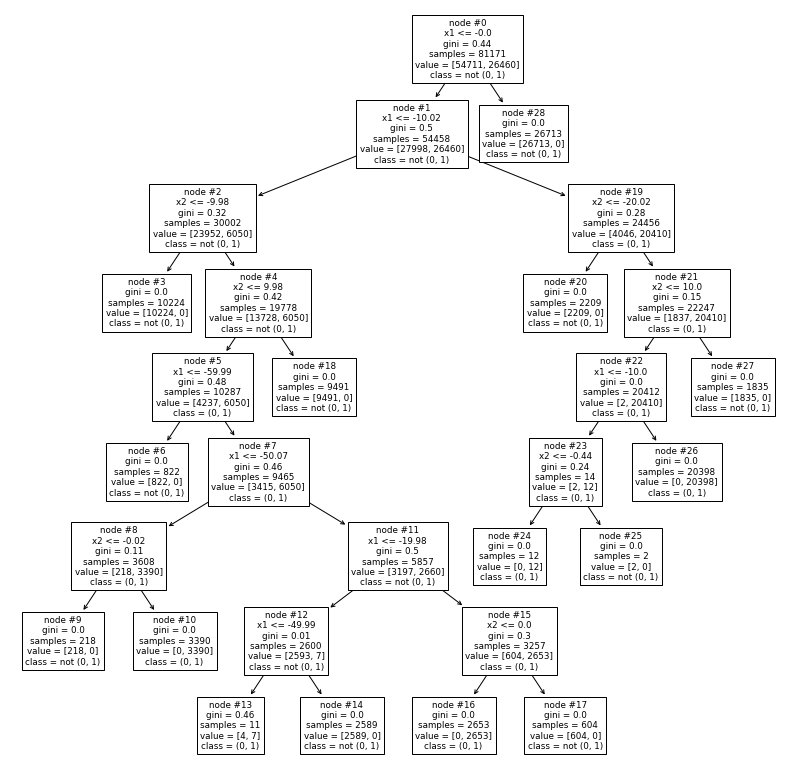

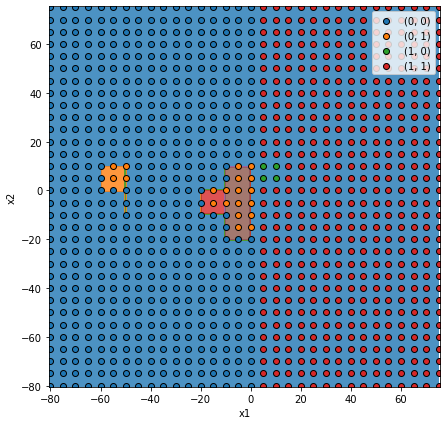

In [15]:
explain(max_depth=8)

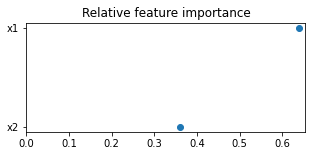

node #28: if (x1 > -10.0) and (x1 <= -0.0) and (x2 > -20.02) and (x2 <= 10.0) then class (0, 1) (covers 1.0 of 20398 instances)
node #10: if (x1 > -59.99) and (x1 <= -50.07) and (x2 > -0.02) and (x2 <= 9.98) then class (0, 1) (covers 1.0 of 3390 instances)
node #18: if (x1 > -19.98) and (x1 <= -10.02) and (x2 > -9.98) and (x2 <= 0.0) then class (0, 1) (covers 1.0 of 2653 instances)
node #26: if (x1 > -10.02) and (x1 <= -10.0) and (x2 > -20.02) and (x2 <= -0.44) then class (0, 1) (covers 1.0 of 12 instances)
node #15: if (x1 > -50.07) and (x1 <= -49.99) and (x2 > -0.29) and (x2 <= 9.98) then class (0, 1) (covers 1.0 of 7 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (0, 1)       1.00      1.00      1.00     54711
      (0, 1)       1.00      1.00      1.00     26460

    accuracy                           1.00     81171
   macro avg       1.00      1.00      1.00     81171
weighted avg       1.00      1.00      1.00     81171


origi

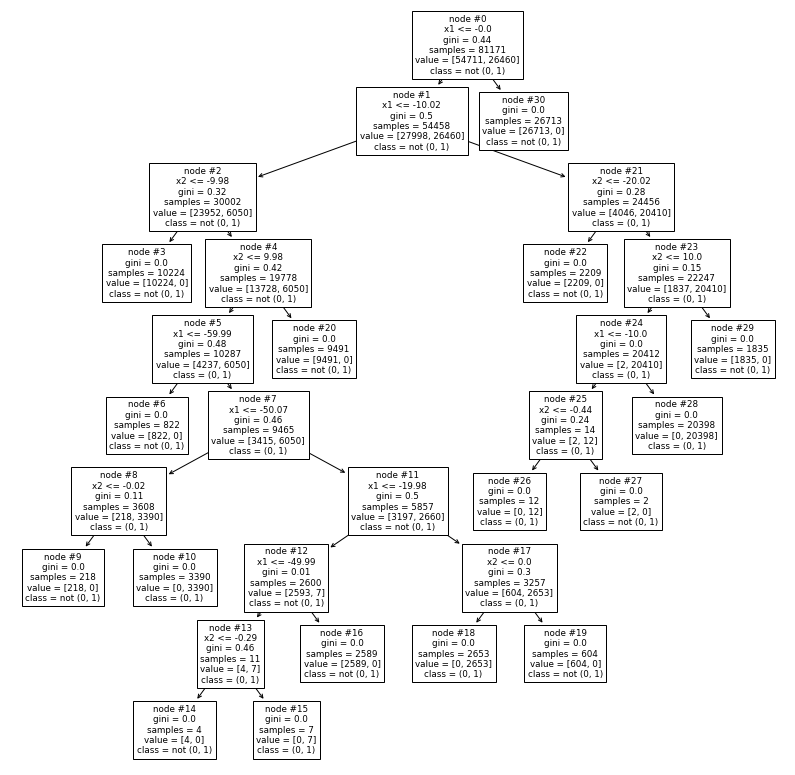

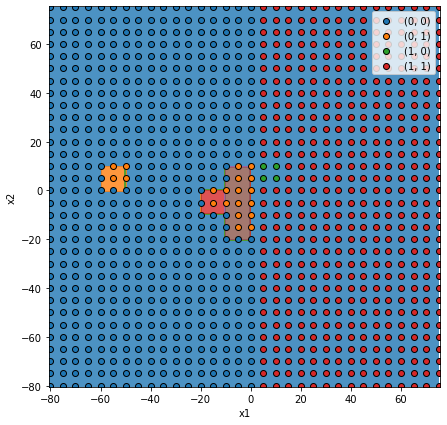

In [16]:
explain(max_depth=9)

The F1-score is now at its maximum, and the tree fully grown.

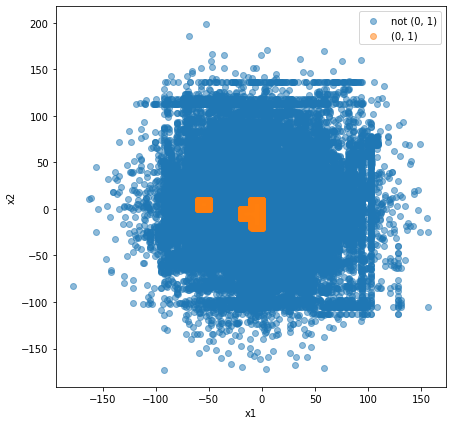

In [17]:
plot_diro2c_2d(explanation, 'x1', 'x2')

## $(1,0)$

In [17]:
focus_class = '(1, 0)'

In [58]:
%%time
explainer = WrappedDiro2C(X, comparer, focus_class)
explanation = explainer.generate_global_explanation()
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump((explainer, explanation), f, pickle.HIGHEST_PROTOCOL)

CPU times: user 25min 22s, sys: 15.3 s, total: 25min 38s
Wall time: 27min 54s


In [18]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explainer, explanation = pickle.load(f)

In [19]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [20]:
is_explain_diff = explainer.clf_a.predict(X_explain) != explainer.clf_b.predict(X_explain)
(is_explain_diff != y_explain).sum(), len(y_explain)

(0, 54540)

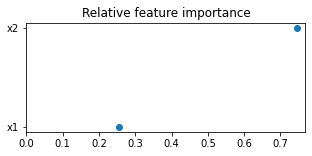

node #5: if (x1 > -0.12) and (x2 > 0.01) and (x2 <= 10.0) then class (1, 0) (covers 0.829 of 6338 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       1.00      0.98      0.99     49286
      (1, 0)       0.83      1.00      0.91      5254

    accuracy                           0.98     54540
   macro avg       0.91      0.99      0.95     54540
weighted avg       0.98      0.98      0.98     54540


original data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       1.00      0.99      0.99      1020
      (1, 0)       0.12      0.50      0.20         4

    accuracy                           0.98      1024
   macro avg       0.56      0.74      0.60      1024
weighted avg       0.99      0.98      0.99      1024



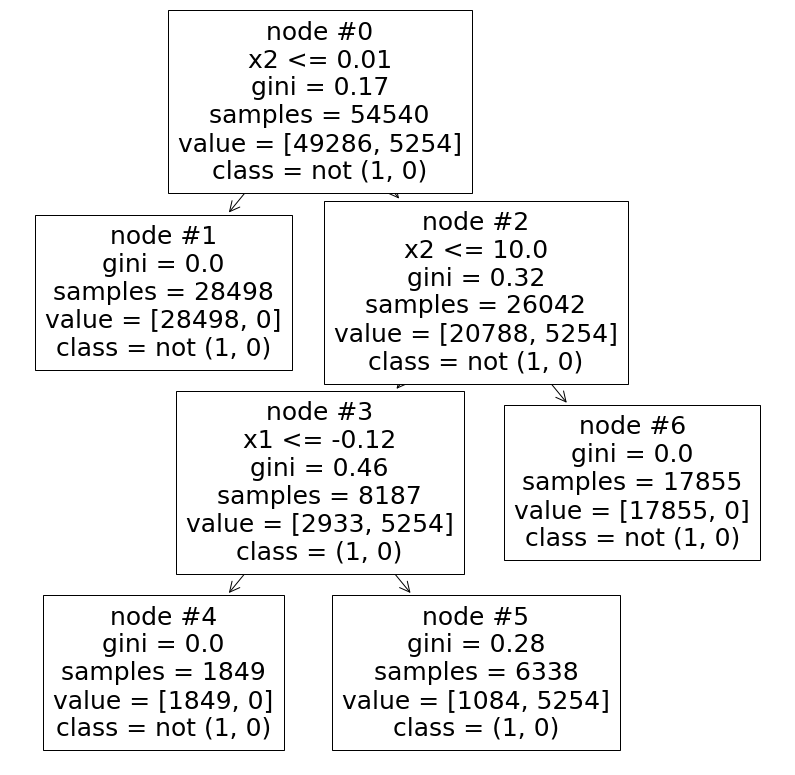

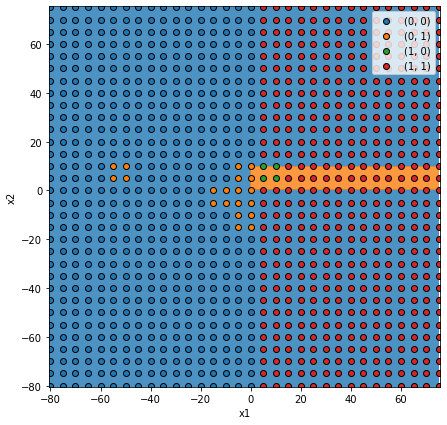

In [21]:
explain(max_depth=3)

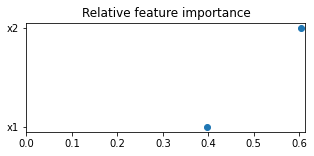

node #6: if (x1 > -0.12) and (x1 <= 10.0) and (x2 > 0.01) and (x2 <= 10.0) then class (1, 0) (covers 1.0 of 5254 instances)

generated data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       1.00      1.00      1.00     49286
      (1, 0)       1.00      1.00      1.00      5254

    accuracy                           1.00     54540
   macro avg       1.00      1.00      1.00     54540
weighted avg       1.00      1.00      1.00     54540


original data evaluation:
              precision    recall  f1-score   support

  not (1, 0)       1.00      1.00      1.00      1020
      (1, 0)       0.67      0.50      0.57         4

    accuracy                           1.00      1024
   macro avg       0.83      0.75      0.78      1024
weighted avg       1.00      1.00      1.00      1024



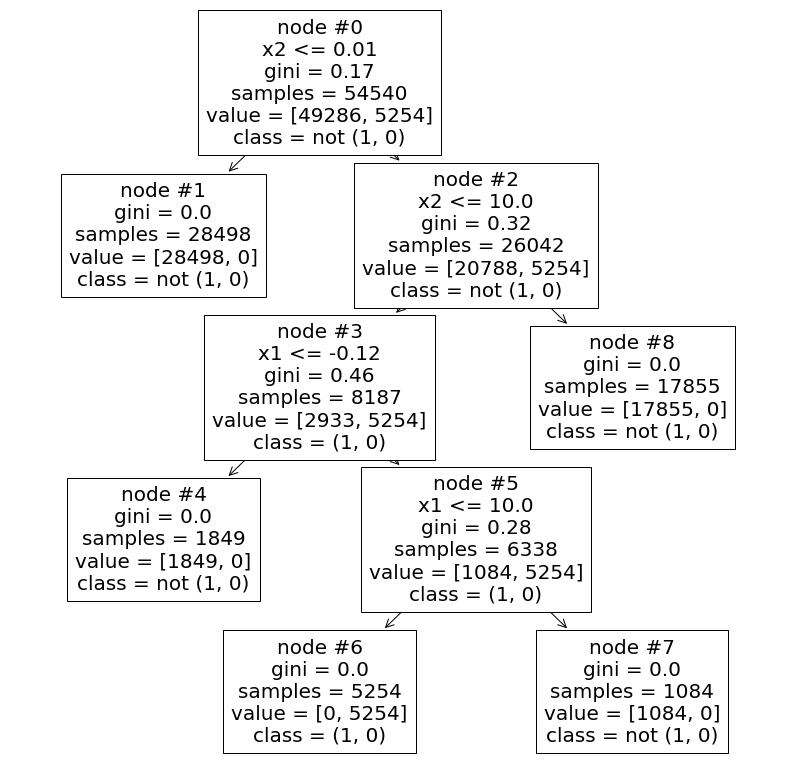

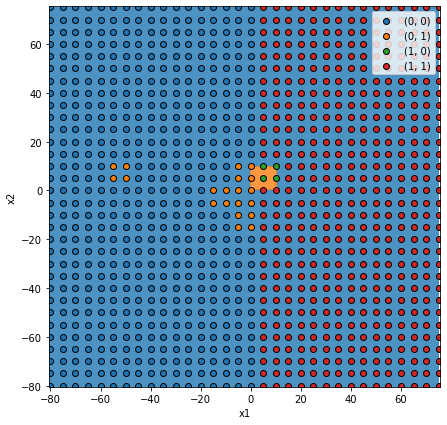

In [22]:
explain(max_depth=4)

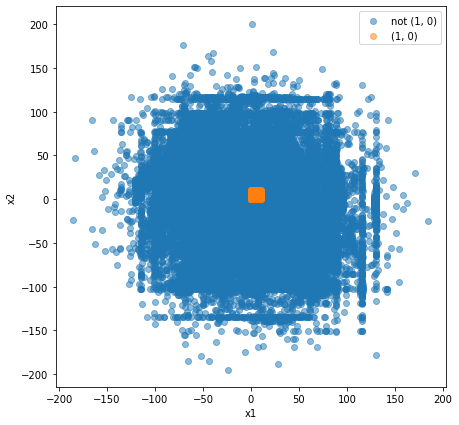

In [23]:
plot_diro2c_2d(explanation, 'x1', 'x2')

## Interpretation

### Predictability
The explanation generalizes to all differences, but rules 26 and 15 do not generalize well.

### Fidelity
- $(0,1)$:
    - difference #1: rules 28, 18, 26
        - rules 26 and 28 describe differences 1.1-1.3
            - x2 lower bound differs by 0.02 for $-19.98<x1≤-10.02$
            - x2 lower bound differs by 10.02, upper bound by 0.44 for $-10.02<x1≤-10$
        - rule 18 describes difference 1.4
            - x2 lower bound differs by 0.02
            - x1 lower bound differs by 0.02
    - difference #2: rules 10, 50
        - x1 lower bound differs by 0.01, upper bound by 0.01, with a gap of 0.04 between the rules
        - x2 lower bound differs by 0.02, upper bound by 0.02 for both rules
- $(1,0)$:
    - difference #3: rule 6
        - x1 lower bound differs by 0.12
        - x2 lower bound differs by 0.01

### Selectiveness
There are 2 more rules than would have been necessary.

### Persuability
A disadvantage is shown in this example: that the decision tree trained on the genetically generated instance may not evaluate equally well on the original data set. In this case, it's exaggerated because many instances are at the exact boundaries, which classify wrongly in the surrogate model. In practical settings, this may not be a problem. And to the person interpreting, small deviations do not hinder interpretation.

But as can be seen with rules 26 and 15, another disadvantage is that the method may create arbitrary rules with very low scope at the decision boundaries that make explanations more complex without providing real insights.

Low F1 score on original data: All explanations are low on F1 score (both precision and recall) when evaluation on the original data. This is because of the tree being trained on the genetically generated data set, and not hitting the exact (artificial) boundaries at whole numbers. In a practical setting this is usually no problem.

Interpretation time: Need to create 7 trees for $(0,1)$, 2 trees for $(1,0)$ to arrive at the final explanation.